In [1]:
import xmltodict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from html.parser import HTMLParser  # Python 3
DATA_FILENAME = "data/Formspring_dataset.xml"
formspring_dict = xmltodict.parse(open("data/Formspring_dataset.xml","rb"))
formspring_dict = formspring_dict['dataset']['FORMSPRINGID']
df = pd.DataFrame(formspring_dict)['POST']

In [2]:
post_arr = df.values
df_all = pd.DataFrame()
for post in post_arr:
    print('.',end='')
    if isinstance(post, list):
        for i in post:
            df_all = pd.concat([df_all, pd.DataFrame(i)])
    else:
        df_all = pd.concat([df_all, pd.DataFrame(post)])

..................................................

In [3]:
df_all['ANSWER'] = df_all['LABELDATA'].apply(lambda label_dict: label_dict['ANSWER'] == 'Yes')

In [4]:
df_all.loc[df_all['TEXT'] == 'Q: Do me?<br>A: Oh yes please.']['LABELDATA'].values

array([OrderedDict([('ANSWER', 'No'), ('CYBERBULLYWORD', 'N/A.'), ('SEVERITY', '0'), ('OTHER', None), ('WORKTIME', '17'), ('WORKERID', 'ARQ6ILX0XRYTP')]),
       OrderedDict([('ANSWER', 'Yes'), ('CYBERBULLYWORD', 'Do me?'), ('SEVERITY', '3'), ('OTHER', None), ('WORKTIME', '26'), ('WORKERID', 'A269TMRE3QBHN')]),
       OrderedDict([('ANSWER', 'No'), ('CYBERBULLYWORD', 'n/a'), ('SEVERITY', '0'), ('OTHER', None), ('WORKTIME', '11'), ('WORKERID', 'A1FUKU9KLSJ9ZP')]),
       OrderedDict([('ANSWER', 'No'), ('CYBERBULLYWORD', 'n/a'), ('SEVERITY', '0'), ('OTHER', None), ('WORKTIME', '15'), ('WORKERID', 'A1UMG5JU4VW48R')]),
       OrderedDict([('ANSWER', 'No'), ('CYBERBULLYWORD', None), ('SEVERITY', '0'), ('OTHER', '"sexual, but response indicates not bullying"'), ('WORKTIME', '40'), ('WORKERID', 'A37SC5J8FEGELD')]),
       OrderedDict([('ANSWER', 'No'), ('CYBERBULLYWORD', 'n/a'), ('SEVERITY', '0'), ('OTHER', None), ('WORKTIME', '11'), ('WORKERID', 'A1264GOK2Z3WSE')]),
       OrderedDict([('ANS

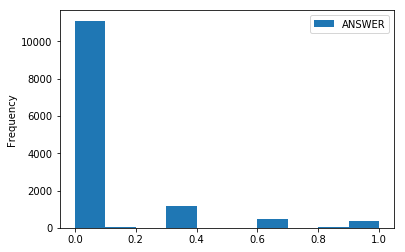

In [5]:
df_labelled_mean = df_all.groupby('TEXT').mean()
# df_labelled_mean = df_labelled_mean.loc[df_labelled_mean['ANSWER'] != 0]
df_labelled_mean.plot(kind='hist')
plt.show()

In [11]:
df_all.columns

Index(['TEXT', 'ASKER', 'LABELDATA', 'ANSWER'], dtype='object')

In [6]:
# df_labelled_mean.groupby('ANSWER').count()
# df_labelled_mean.loc[df_labelled_mean['ANSWER'] > 0.6]
#s = "Q: &amp;&amp; IF U DNT WANNA BAKK OFF HA DICK DEN HOE U FIN TA HAVE TU GET DHA FADEE ON U STREET HOE. CUSS ITS WATEVAA WEN SOME PUSSY ASSS HOE LYK U GUN TRY DISRESPECT WUN US . I KNO SUMBODY WHO SAID DAY NO U N BITCH WELL FIND YO MUTHA FUKN HOUSE HOE. DNT FUKN TRYUS<br>A: hoe dnt be anomnous. :]"


parser = HTMLParser()
df_all['TEXT'] = df_all['TEXT'].str.strip('Q: ').str.replace('<br>A:', '').apply(parser.unescape)
df_label_mean = df_all.groupby('TEXT').mean()
df_label_mean.to_csv('final_data/Formspring.csv', index=True, header=False)
df_label_mean
#html_decoded_string = parser.unescape(s)
#html_decoded_string

,ANSWER
TEXT,
ok ik this is natalie,0.000000
vvv,0.000000
! I'm a close frien wel thankyouuu and i trust your a close friend . but whoo aree youuu Fb mail Me :) Pleaseee. ;) x,0.000000
! W@N+ YUh 2 T3@R M@ PU$$$Y UHP dnt worry iWill,0.000000
! W@NTt Y3Ww TA SW@Ll0wW M@ T@MP0N DH3N PUT !T B@CK IN MY VAGqINA WIT CHOO LIPSZZZ . im sorry datz wun thing iDnt do,0.333333
! w@N+ yUh +0 $M@(K m3 & m@k3 dH@ SEx w!Ld n h0+ iWill,0.000000
! w@n+ y0 b!q d!(k $uRf@(!n m@ l!pSz$ anytyme,0.333333
! w@n+ yUh t@ m@k3 m3 $w3@+ ohkay iWill,0.000000
! w@nN@ l!qqhH+ y0 d!(K 0N f!r3 N d3nN sM0k3 !t w!+ m@ v@q!n@ lol yew on sum otha shxt nd not even dressed in all black,0.333333


In [7]:
len(df_label_mean)

13156

In [15]:
parser = HTMLParser()
df_all['TEXT'] = df_all['TEXT'].str.strip('Q: ').str.replace('<br>A:', '').apply(parser.unescape)
df_label_mean = df_all.groupby('TEXT').mean()
df_label_mean.to_csv('final_data/Formspring.csv', index=True, header=False)
df_label_mean

0    what's your favorite song? :D I like too many ...
0                                <3 </3 ? haha jk! <33
0    "hey angel  you duh sexy" Really?!?! Thanks?! ...
0                                                (: ;(
0    ******************MEOWWW**********************...
0    any makeup tips? i suck at doing my makeup lol...
0    Apriiiiiiiiiiiill!!! I miss uuuu! It's Emma bt...
0    Are you a morning or night person? Night 4shur...
0            are you a trusting person? alreadi answrd
0    are you a trusting person? Yes veryy trustin p...
0    Are you and @TruAce best friends? Ahaha!!! Yes...
0    Are you more of a talker or more of a listener...
0    Are yuh single and ready 2 mingle?! Hahaha Yup...
0                               ask me something!!! :)
0    BAHAHAhAHA....took you longer enough;p......GE...
0                           bahahahahhaha ;p lmaoo!!!!
0    Bitch u thee bomb like Tick TICK! Hahah(: Thanks!
0    can you please sing a cover of any justin bieb...
0         

,ANSWER
TEXT,
! I'm a close frien wel thankyouuu and i trust your a close friend . but whoo aree youuu Fb mail Me :) Pleaseee. ;) x,0.000000
! W@N+ YUh 2 T3@R M@ PU$$$Y UHP dnt worry iWill,0.000000
! W@NTt Y3Ww TA SW@Ll0wW M@ T@MP0N DH3N PUT !T B@CK IN MY VAGqINA WIT CHOO LIPSZZZ . im sorry datz wun thing iDnt do,0.333333
! w@N+ yUh +0 $M@(K m3 & m@k3 dH@ SEx w!Ld n h0+ iWill,0.000000
! w@n+ y0 b!q d!(k $uRf@(!n m@ l!pSz$ anytyme,0.333333
! w@n+ yUh t@ m@k3 m3 $w3@+ ohkay iWill,0.000000
! w@nN@ l!qqhH+ y0 d!(K 0N f!r3 N d3nN sM0k3 !t w!+ m@ v@q!n@ lol yew on sum otha shxt nd not even dressed in all black,0.333333
! w@nn@ fuck y0u. @nd y0u d!d f0rq3+ @b0u+ d@+ h03 VvV lol,0.000000
! wUnN@ sU(k y0 d!(k so kum nd do it,0.333333


In [20]:
# generate unlabeled data
df_all.loc[0]["TEXT"].to_csv("final_data/formspring_unlabeled.csv",index=False, header=False)